In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import tensorflow as  tf
import numpy as np
import cv2
import os
from keras.utils import np_utils
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.layers import Conv2D, MaxPooling2D

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [4]:
train_dataset=train.flow_from_directory('/content/drive/MyDrive/image/train',
                                      target_size = (150,150),
                                       batch_size = 12, 
                                       class_mode = 'categorical') 

validation_dataset=validation.flow_from_directory('/content/drive/MyDrive/image/test',
                                      target_size = (150,150),
                                       batch_size = 12,  
                                       class_mode = 'categorical')    

Found 90 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [5]:
train_dataset.class_indices

{'CoKhauTrang': 0, 'KhongKhauTrang': 1}

In [6]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',padding='same',input_shape =(150,150,3)),
                                    tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',padding='same'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',padding='same'),
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',padding='same'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding='same'),
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding='same'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu',padding='same'),
                                    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu',padding='same'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(256,activation = 'relu'),
                                    ##
                                    tf.keras.layers.Dense(2,activation='softmax')
                                    ])

In [7]:
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [8]:
history = model.fit(train_dataset,batch_size=12,epochs=20,verbose=1,validation_data=validation_dataset)

Epoch 1/20
8/8 [==============================] - 68s 7s/step - loss: 0.6969 - accuracy: 0.3333 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 2/20
8/8 [==============================] - 1s 75ms/step - loss: 0.6856 - accuracy: 0.6889 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/20
8/8 [==============================] - 1s 77ms/step - loss: 0.6749 - accuracy: 0.6667 - val_loss: 0.6951 - val_accuracy: 0.5000
Epoch 4/20
8/8 [==============================] - 1s 72ms/step - loss: 0.6637 - accuracy: 0.6667 - val_loss: 0.6984 - val_accuracy: 0.5000
Epoch 5/20
8/8 [==============================] - 1s 72ms/step - loss: 0.6542 - accuracy: 0.6667 - val_loss: 0.7028 - val_accuracy: 0.5000
Epoch 6/20
8/8 [==============================] - 1s 70ms/step - loss: 0.6435 - accuracy: 0.6667 - val_loss: 0.7083 - val_accuracy: 0.5000
Epoch 7/20
8/8 [==============================] - 1s 71ms/step - loss: 0.6356 - accuracy: 0.6667 - val_loss: 0.7168 - val_accuracy: 0.5000
Epoch 8/20
8/8 [============

In [9]:
model.save('CNN_faceDetection.h5')
model=load_model('CNN_faceDetection.h5')
score=model.evaluate(validation_dataset,verbose=1)
print("test loss = ",score[0])
print("test accuracy = ",score[1])

4/4 [==============================] - 0s 34ms/step - loss: 0.7054 - accuracy: 0.5000
test loss =  0.7054117321968079
test accuracy =  0.5


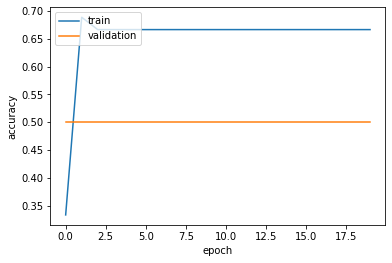

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

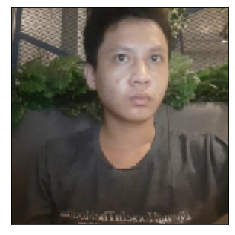

KhongKhauTrang


In [11]:
img = load_img("/content/drive/MyDrive/image/test/KhongKhauTrang/11.jpg", target_size=(150,150))
plt.xticks([])
plt.yticks([])
plt.imshow(img)
plt.show()
x= img_to_array(img)
x=np.expand_dims(x,axis=0)
images = np.vstack([x])
val=np.argmax(model.predict(images))
if val == 0:
    print("CoKhauTrang")
if val == 1:
    print("KhongKhauTrang")


